Notebook created by: Jiacheng Yao

## General Remarks

In this exercise, we want to see how you deal with a data science challenge involving our customer base. We have data on 10.000 (fictitious) customers of DKB, and want to understand which of these customers we will be able to retain. We want to use the insights you generate to improve our customer retention, and identify customers at risk of leaving DKB.

## Your Task

1. Do an explorative analysis of the given dataset .
2. Build a predictive model. Given customer data, predict whether the customer will be retained over the next 3 months.
3. From the customers currently retained, find the top k customers at highest risk of leaving DKB

You may spend as much time (until the submission deadline) on the challenge as you want. However, the task is not (primarily) to build the best, most predictive model, but rather to understand how you approach such a question and how you present your results.

Often times, a graph says more than a thousand words. Instead of providing long descriptive answers you are encouraged to visualize your results in a graph or chart and give a brief summary of your results.

We expect you will need around 3 to 4 hours of effort to produce a first iteration solution.

## Evaluation

Your submission will be evaluated based on the following criteria:
1. Clear communication of results
2. Proficiency in machine learning methods
3. Reproducible and well documented experiments
4. Correctness
5. Good Software Engineering practices
6. Clean code and knowledge of APIs
7. Good evaluation of results and discussion of the methods


## Conditions

You can use any language or toolset to complete the challenge. Keep in mind that the main language in the DKB Data Science team is Python, and that your reviewer may not be familiar with your chosen language and frameworks.

## 1. Explorative Analysis

### 1. Read the data from .csv file

In [1]:
import logging

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Start 1. Explorative Analysis")

INFO:root:Start 1. Explorative Analysis


In [2]:
df_dkb = pd.read_csv("data.csv", sep = ",")

### 2. Take a first look at the data:

In [3]:
df_dkb.head()

,id,last_name,credit_score,country,gender,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,retained
0,15634602,Hargrave,619,Switzerland,f,42,2,0.00,1,1,1,101348.88,0
1,15647311,Hill,608,Austria,f,41,1,83807.86,1,0,1,112542.58,1
2,15619304,Onio,502,Switzerland,f,42,8,159660.80,3,1,0,113931.57,0
3,15701354,Boni,699,Switzerland,f,39,1,0.00,2,0,0,93826.63,1
4,15737888,Mitchell,850,Austria,f,43,2,125510.82,1,1,1,79084.10,1


In [4]:
df_dkb.shape

(10000, 13)

### 3. Check if there are missing values in the columns:

In [5]:
# Check if there are missing values in the columns:
def missing_value_checker(df):
    for col in df.columns:
        logging.info(col+': '+str(df[col].isnull().sum()/float(df.shape[0])))

In [6]:
missing_value_checker(df_dkb)

INFO:root:id: 0.0
INFO:root:last_name: 0.0
INFO:root:credit_score: 0.0
INFO:root:country: 0.0
INFO:root:gender: 0.0
INFO:root:age: 0.0
INFO:root:years_customer: 0.0
INFO:root:balance_euros: 0.0
INFO:root:num_products: 0.0
INFO:root:has_credit_card: 0.0
INFO:root:is_active: 0.0
INFO:root:salary_euros: 0.0
INFO:root:retained: 0.0


**Comment**: _No Missing Data in any columns found._

### 4. See how many unique values there are for each column:

In [7]:
# See how many unique values there are for each columns, and if there is only one unique value, we drop the column
def unique_value_printer(df):
    cols_to_drop = []
    for col in df.columns:
        tmp_num_unique = len(df[col].unique())
        logging.info(col+': '+str(tmp_num_unique))
        if (tmp_num_unique==1):
            cols_to_drop.append(col)
    df.drop(cols_to_drop, 1, inplace=True)

In [8]:
unique_value_printer(df_dkb)

INFO:root:id: 10000
INFO:root:last_name: 2925
INFO:root:credit_score: 460
INFO:root:country: 3
INFO:root:gender: 2
INFO:root:age: 70
INFO:root:years_customer: 11
INFO:root:balance_euros: 6382
INFO:root:num_products: 4
INFO:root:has_credit_card: 2
INFO:root:is_active: 2
INFO:root:salary_euros: 9999
INFO:root:retained: 2


**Comment**: _each row has a unique id, there are 2925 last names. country, gender, num_product, has_credit_card, is_active, retained are all categorical variables. the rest are numerical._

### 5. Summarize the dataframe

In [9]:
df_dkb.describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

,id,credit_score,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,retained
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.796300
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
10%,1.559117e+07,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000
20%,1.561638e+07,566.000000,31.000000,2.000000,0.000000,1.000000,0.00000,0.000000,41050.736000,0.000000
30%,1.564136e+07,598.700000,33.000000,3.000000,0.000000,1.000000,1.00000,0.000000,60736.079000,1.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000
60%,1.571569e+07,678.000000,40.000000,6.000000,110138.926000,2.000000,1.00000,1.000000,119710.038000,1.000000
70%,1.574046e+07,704.000000,42.000000,7.000000,122029.870000,2.000000,1.00000,1.000000,139432.236000,1.000000


### 6. Let us take a closer look at some important features:

In [10]:
def plot_general_dist(df, col, title=None, outfile=None):
    # plot general histogram
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    if title is not None:
        sns.distplot(df[col]).set_title(title)
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_comparison_dist(df1, df2, col, label1, label2, title=None, outfile=None):
    # plot comparison histogram
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)

    sns.distplot(df1[col], hist=False, rug=False, label=label1)
    sns.distplot(df2[col], hist=False, rug=False, label=label2).set_title(title)
    
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_general_bar(df, group_col, agg_col, title=None, outfile=None):
    # plot general barplot
    df_grouped = df.groupby([group_col]).agg({agg_col:'count'}).reset_index()

    fig, axis = plt.subplots(1,1,figsize=(15, 7))

    sns.barplot(x=group_col, y=agg_col, data=df_grouped, order=df_grouped[group_col].unique(), ax=axis)
    axis.set_xticks(range(len(df_grouped[group_col].unique())))
    axis.set_xticklabels(df_grouped[group_col].unique(), rotation=0)
    
    if title is not None:
        axis.set_title(title)
    if outfile is not None:
        plt.savefig(outfile)
        
def plot_comparison_bar(df, group_col, agg_col, hue_col, title=None, outfile=None):
    df_grouped_by_col = df.groupby([group_col, hue_col]).agg({agg_col:'count'}).reset_index()

    g = sns.catplot(x=group_col, y=agg_col, hue=hue_col, data=df_grouped_by_col,
                    kind="bar", palette="muted", height=6, aspect=2)
    g.despine(left=True)
    g.set_ylabels("Count")
    
    if title is not None:
        g.fig.suptitle(title)
    if outfile is not None:
        g.fig.savefig(outfile)

In [11]:
df_dkb_retained = df_dkb[df_dkb['retained']==1]
df_dkb_not_retained = df_dkb[df_dkb['retained']==0]

#### a) Credit Score

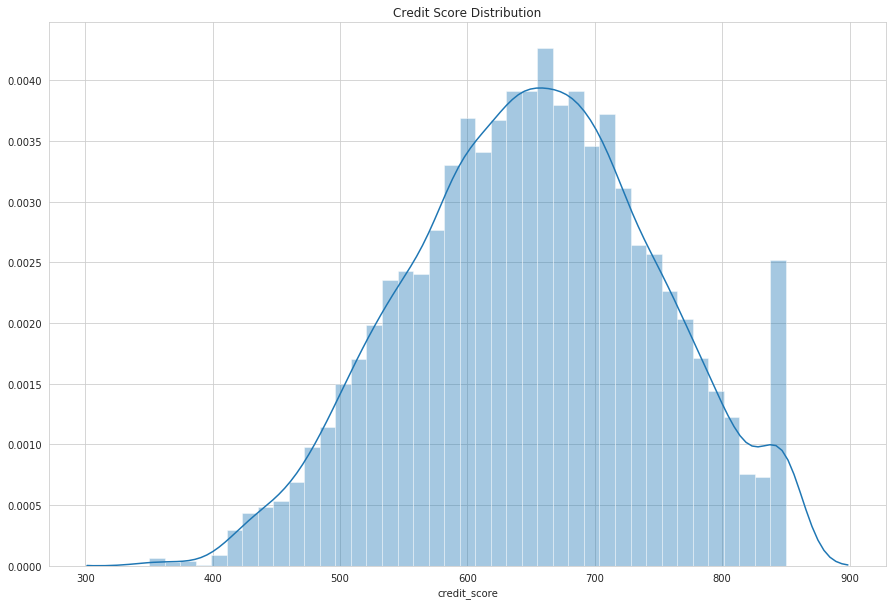

In [12]:
# plot the histogram for credit score
plot_general_dist(df_dkb, 'credit_score', 'Credit Score Distribution', 'credit_score_dist.png')

**Comment**: _Credit score has a max ceiling of 850, which causes the spike at the right end of the curve._

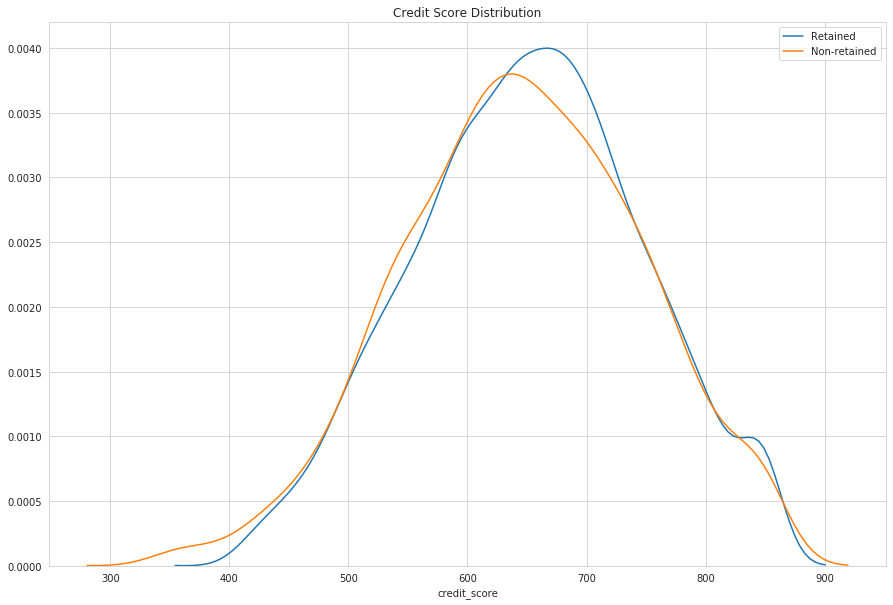

In [13]:
# plot the histogram for credit score per retained class
plot_comparison_dist(df_dkb_retained, df_dkb_not_retained, 'credit_score', 
                     "Retained", "Non-retained", 
                     title='Credit Score Distribution', 
                     outfile='credit_score_comparison_dist.png')

**Comment**: _Retained customers have generally a slightly better credit score than non-retained customers._

#### b) Country

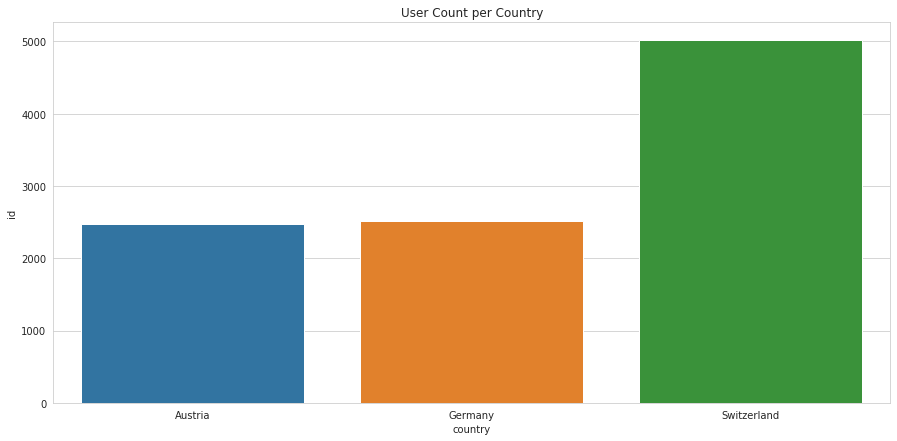

In [14]:
# plot the number of users for each country
plot_general_bar(df_dkb, 'country', 'id', title='User Count per Country', outfile='country_bar.png')

**Comment**: _Most of the customers come from Switzerland._

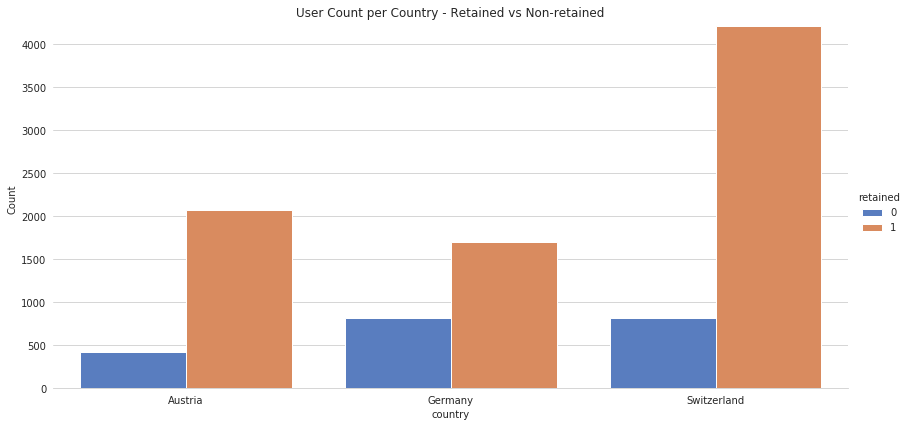

In [15]:
# plot the number of users for each country and retained combination
plot_comparison_bar(df_dkb, 'country', 'id', 'retained', 
                    title='User Count per Country - Retained vs Non-retained', 
                    outfile='country_comparison_bar.png')

In the following sections, $Retention Ratio = \frac{\#Retained Customers}{\#NonretainedCustomers}$

**Comment**: _Germany has the lowest retention ratio, with Austria higher, and Switzerland the highest._

#### c) Gender

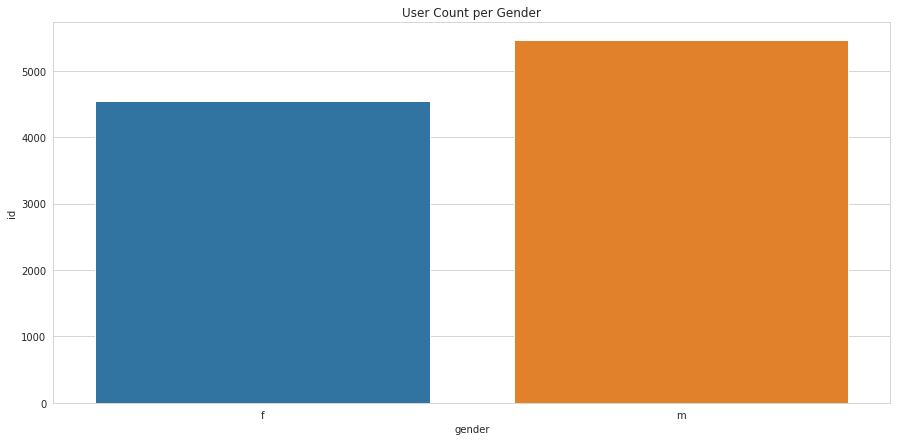

In [16]:
# plot the number of users for each gender
plot_general_bar(df_dkb, 'gender', 'id', title='User Count per Gender', outfile='gender_bar.png')

**Comment**: _Male customers make up a larger portion of the customer base than female._

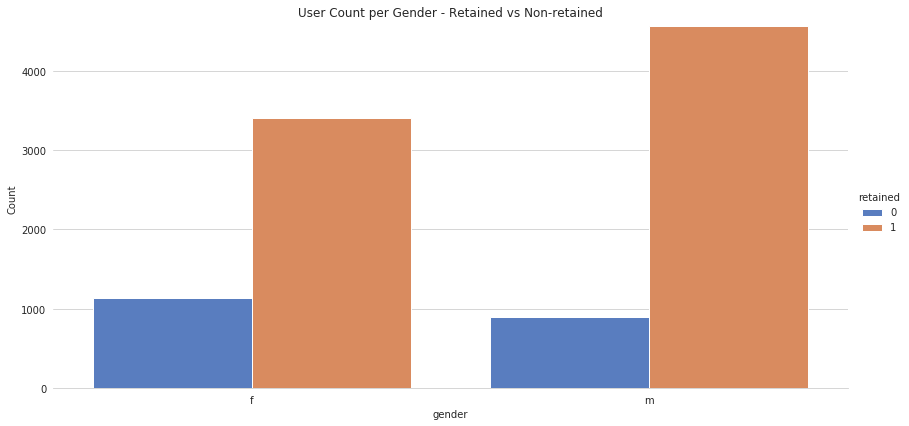

In [17]:
# plot the number of users for each gender and retained combination
plot_comparison_bar(df_dkb, 'gender', 'id', 'retained', 
                    title='User Count per Gender - Retained vs Non-retained', 
                    outfile='gender_comparison_bar.png')

**Comment**: _Male customers have a higher retention ratio than female._

#### d) Age

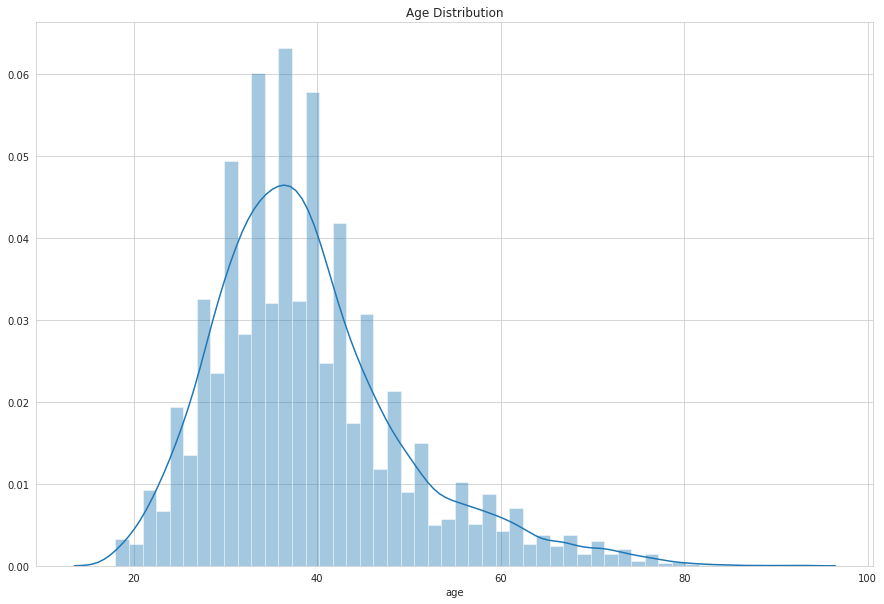

In [18]:
# plot the histogram for age
plot_general_dist(df_dkb, 'age', 'Age Distribution', 'age_dist.png')

**Comment**: _The most of the customers have an age between 25 - 50._

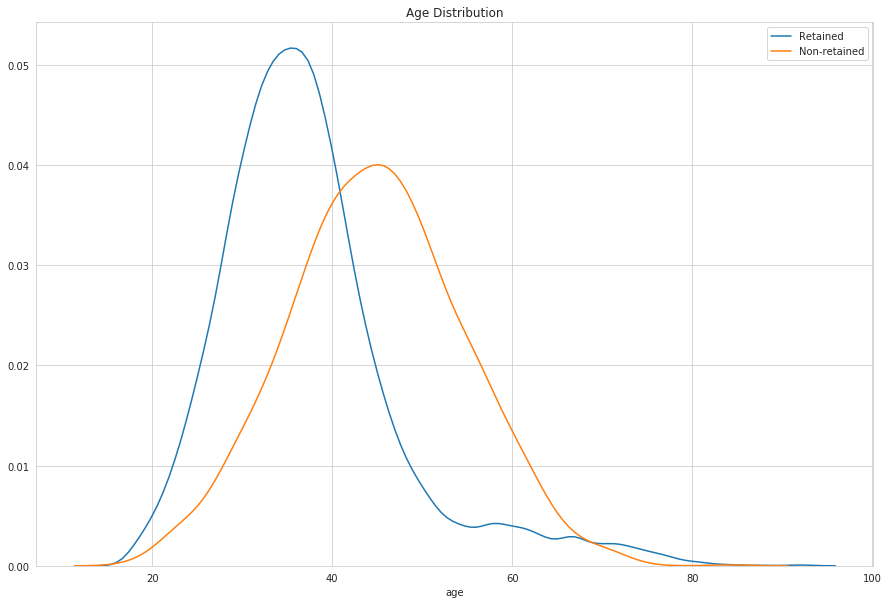

In [19]:
# plot the histogram for age per retained class
plot_comparison_dist(df_dkb_retained, df_dkb_not_retained, 'age', 
                     "Retained", "Non-retained", 
                     title='Age Distribution', 
                     outfile='age_comparison_dist.png')

**Comment**: _Retained customers are generally younger than non-retained customers._

#### e) Years as Customer

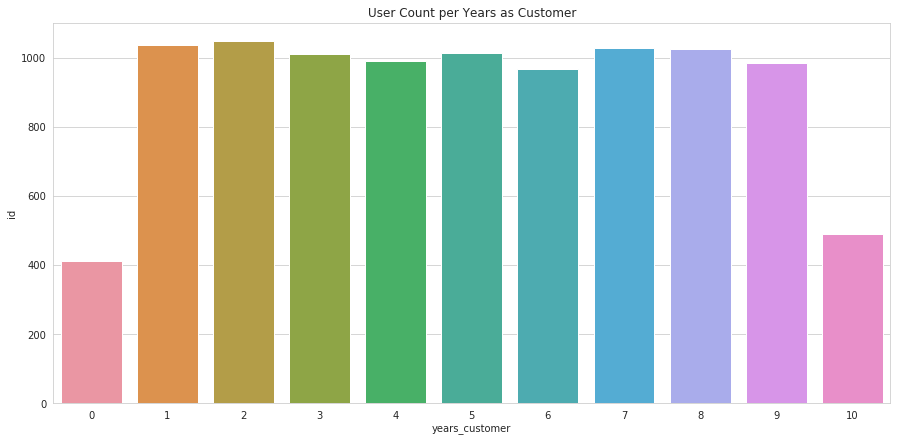

In [20]:
# plot the number of users for each years_customer
plot_general_bar(df_dkb, 'years_customer', 'id', title='User Count per Years as Customer', outfile='years_customer_bar.png')

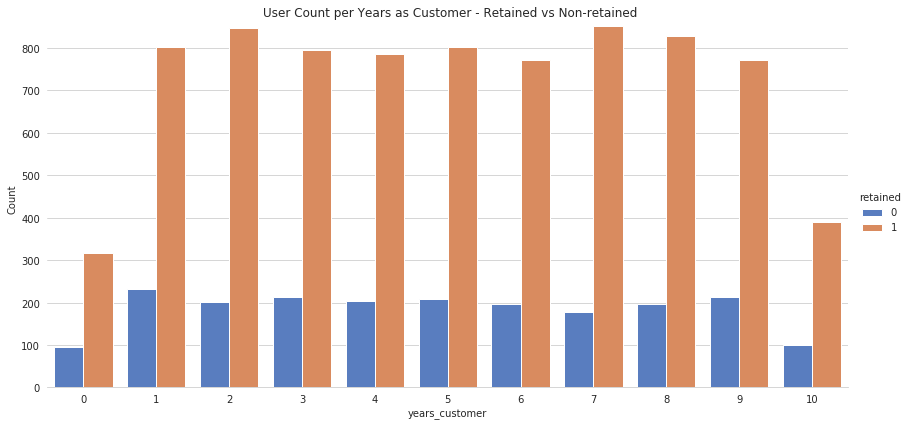

In [21]:
# plot the number of users for each years_customer and retained combination
plot_comparison_bar(df_dkb, 'years_customer', 'id', 'retained', 
                    title='User Count per Years as Customer - Retained vs Non-retained', 
                    outfile='years_customer_comparison_bar.png')

**Comment**: _Customers that have stayed with DKB for more than 1 year have a higher retention rate than customers that have stayed for less than a year._

#### f) Account Balance

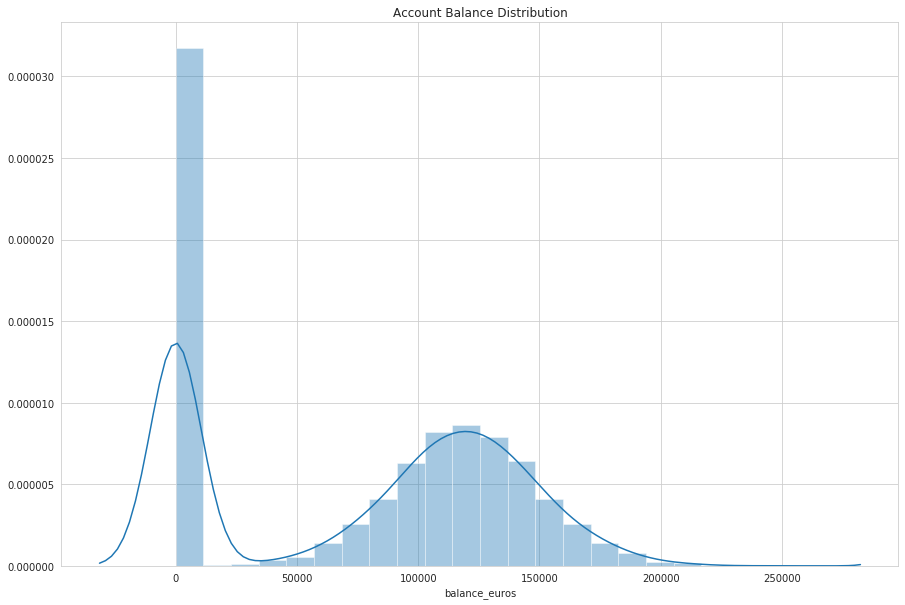

In [22]:
# plot the histogram for account balance
plot_general_dist(df_dkb, 'balance_euros', 'Account Balance Distribution', 'balance_euros_dist.png')

**Comment**: _More than 30% of the customers have an account balance of 0 Euro, which accounts for the spike at the left side of the distribution._

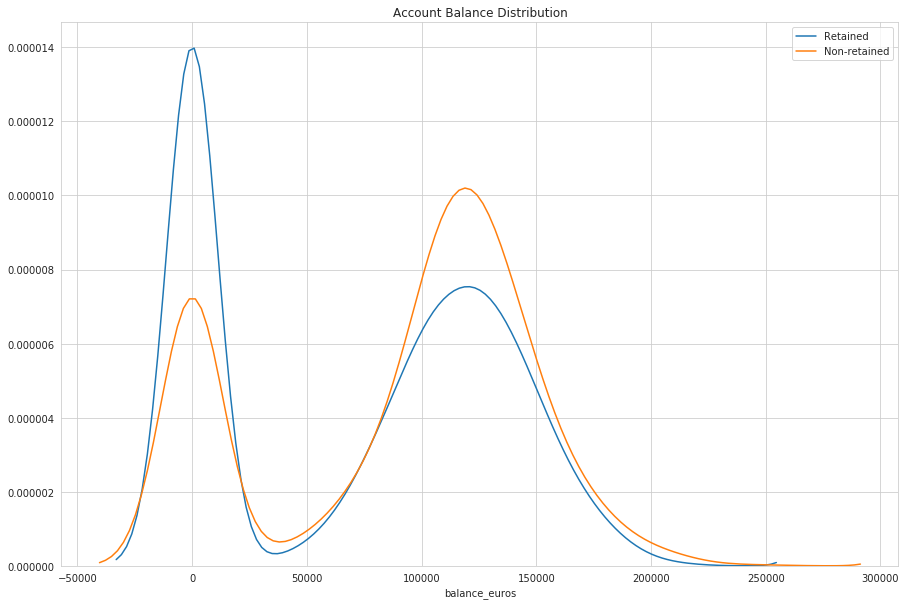

In [23]:
# plot the histogram for account balance per retained class
plot_comparison_dist(df_dkb_retained, df_dkb_not_retained, 'balance_euros', 
                     "Retained", "Non-retained", 
                     title='Account Balance Distribution', 
                     outfile='balance_euros_comparison_dist.png')

**Comment**: _Many more retained customers have a balance of 0 euro than non-retained customers, which is slightly unexpected._

#### g) Number of Products

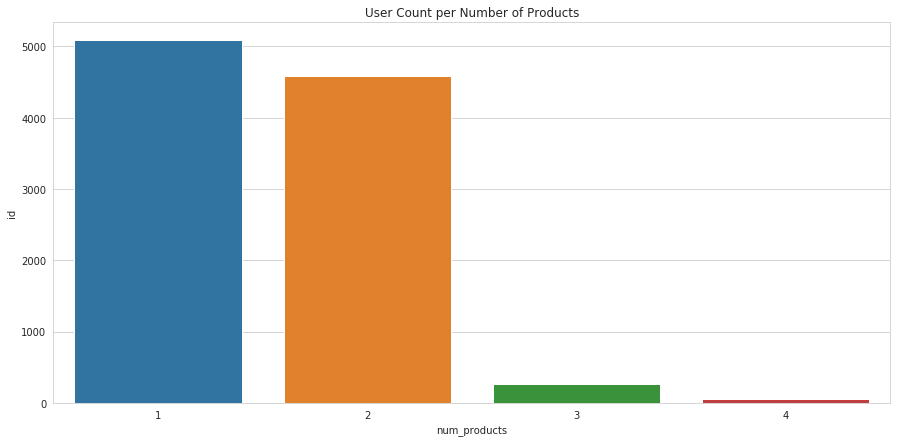

In [24]:
# plot the number of users for each num_products
plot_general_bar(df_dkb, 'num_products', 'id', 
                 title='User Count per Number of Products', outfile='num_products_bar.png')

**Comment**: _A large majority of people have 1 or 2 products._

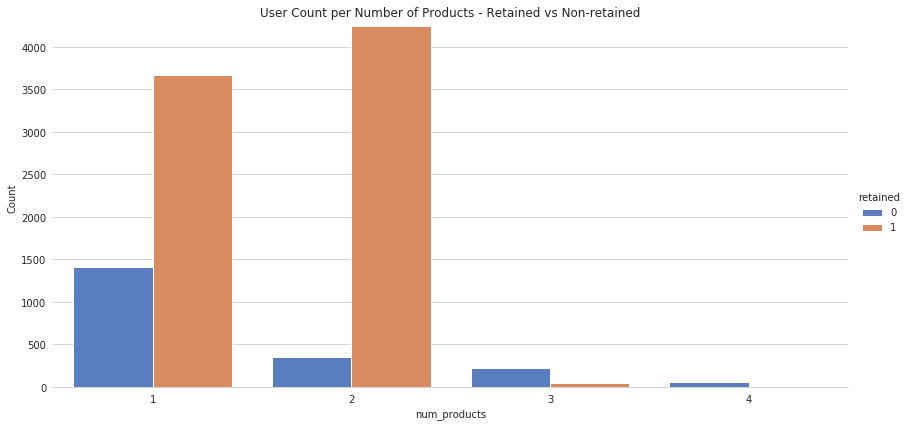

In [25]:
# plot the number of users for each num_products and retained combination
plot_comparison_bar(df_dkb, 'num_products', 'id', 'retained', 
                    title='User Count per Number of Products - Retained vs Non-retained', 
                    outfile='num_products_comparison_bar.png')

**Comment**: _Customers with 2 products have the highest retention ratio, while those with 1 have the second highest, and those with 3 or 4 significantly lower._

#### h) Possession of Credit Card

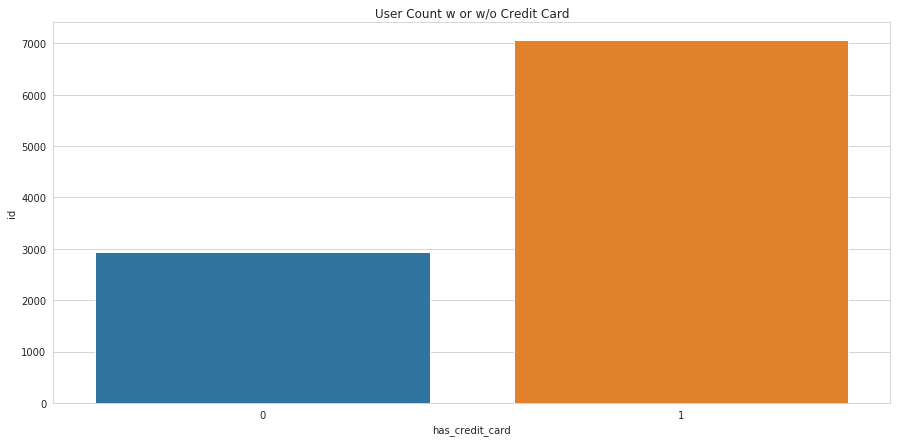

In [26]:
# plot the number of users for each type - has_credit_card
plot_general_bar(df_dkb, 'has_credit_card', 'id', 
                 title='User Count w or w/o Credit Card', outfile='has_credit_card_bar.png')

**Comment**: _Most of the customers have credit card._

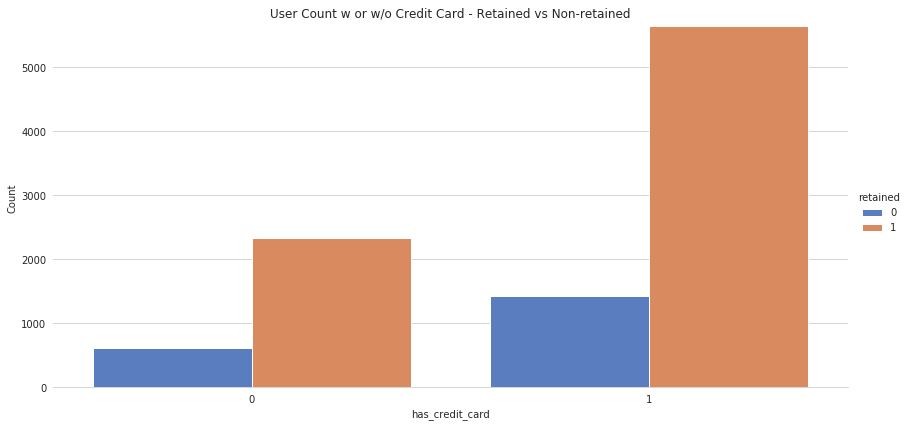

In [27]:
# plot the number of users for each has_credit_card and retained combination
plot_comparison_bar(df_dkb, 'has_credit_card', 'id', 'retained', 
                    title='User Count w or w/o Credit Card - Retained vs Non-retained', 
                    outfile='has_credit_card_comparison_bar.png')

**Comment**: _Customers with a credit card have a higher retention ratio than those without one._

#### i) Active or Not

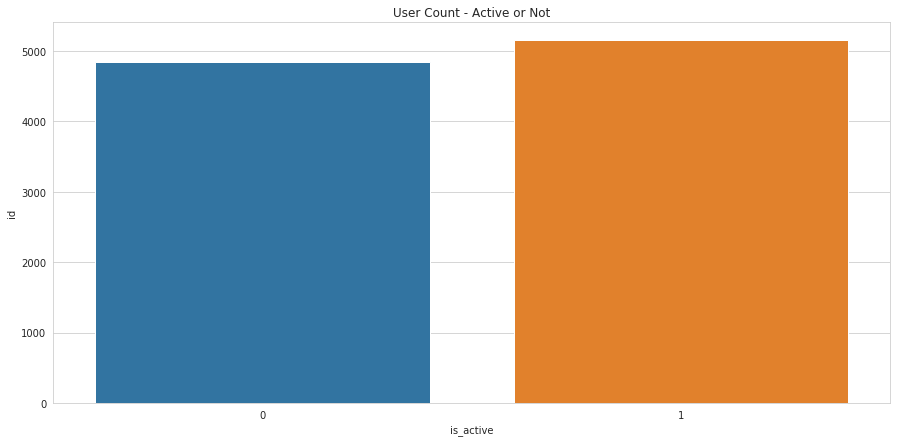

In [28]:
# plot the number of users for each type - is_active
plot_general_bar(df_dkb, 'is_active', 'id', title='User Count - Active or Not', outfile='is_active_bar.png')

**Comment**: _The number of active customers is close to that of non-active customers._

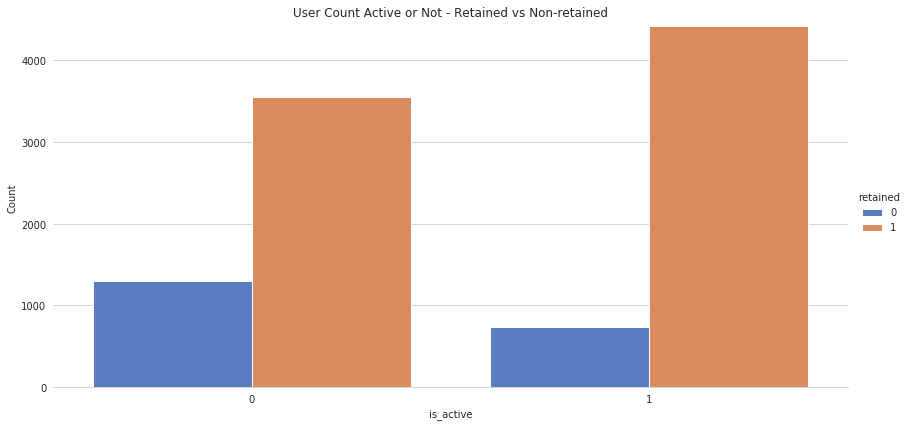

In [29]:
# plot the number of users for each is_active and retained combination
plot_comparison_bar(df_dkb, 'is_active', 'id', 'retained', 
                    title='User Count Active or Not - Retained vs Non-retained', 
                    outfile='is_active_comparison_bar.png')

**Comment**: _Active customers have a much higher retention ratio than non-active customers._

#### j) Salary

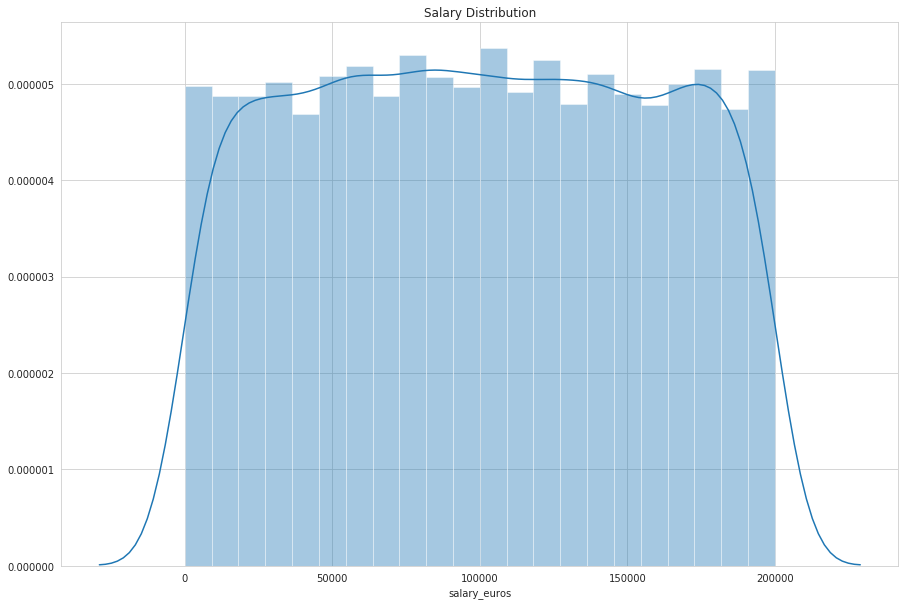

In [30]:
# plot the histogram for salary
plot_general_dist(df_dkb, 'salary_euros', 'Salary Distribution', 'salary_euros_dist.png')

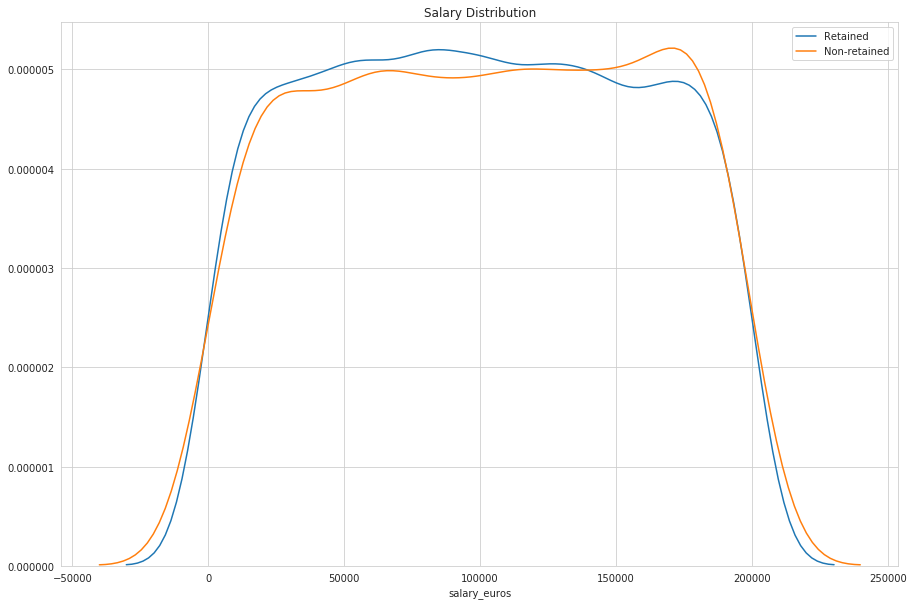

In [31]:
# plot the histogram for salary per retained class
plot_comparison_dist(df_dkb_retained, df_dkb_not_retained, 'salary_euros', 
                     "Retained", "Non-retained", 
                     title='Salary Distribution', 
                     outfile='salary_euros_comparison_dist.png')

**Comment**: _Frequency distributions for retained and non-retained customers are very similar, which means that salary_euro is probably not a good feature to distinguish retained and non-retained customers._

#### j) Retention

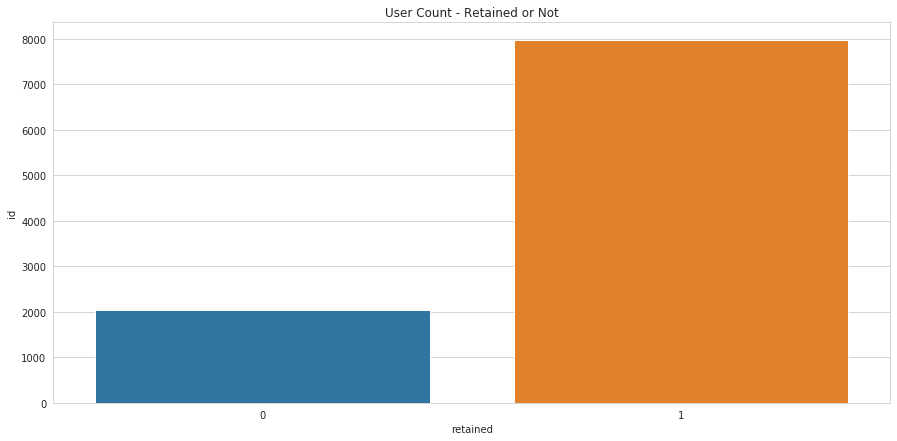

In [32]:
# plot the number of users for each type - retained
plot_general_bar(df_dkb, 'retained', 'id', title='User Count - Retained or Not', outfile='retained_bar.png')

**Comment**: _almost 80% of all customers have been retained, while the remaining 20% have left._

## 2. Build Predictive Model on feature retained

### 1. Convert categorical data with one-hot-encoding and split the data into training and testing parts

In [33]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

# here last_name will be omitted
df_dkb_one_hot = one_hot(df_dkb, ['country', 'gender'])


In [34]:
from sklearn.model_selection import train_test_split

features_to_drop = ['id', 'last_name', 'country', 'gender', 'retained']
features_x = []
for col in df_dkb_one_hot.columns:
    if col in features_to_drop:
        pass
    else:
        features_x.append(col)
        
df_X = df_dkb_one_hot[features_x]
df_y = df_dkb_one_hot['retained']

X_train, X_test, y_train, y_test =\
    train_test_split(df_X, df_y, test_size=0.1, random_state=42)

### 2. Train the model - xgboost, while optimizing hyperparameters with Bayesian Optimization

In [35]:
# convert the training data into DMatrix for xgboost
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)


/home/jiacheng/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [47]:
from sklearn.model_selection import cross_val_score
import warnings

def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              max_delta_step,
              subsample,
              colsample_bytree,
              reg_alpha,
              reg_lambda,
              silent=True,
              nthread=-1,
              random_state=1):
    return cross_val_score(xgb.XGBClassifier(max_depth=int(max_depth),
                                             learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             max_delta_step=max_delta_step,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree,
                                             reg_alpha=reg_alpha,
                                             reg_lambda = reg_lambda),
                           X_train,
                           y_train,
                           cv=5,
                           scoring="roc_auc",
                           n_jobs=-1).mean()

xgboostBO = BayesianOptimization(xgboostcv,
                                 {'max_depth': (2, 5),
                                  'learning_rate': (0.01, 0.3),
                                  'n_estimators': (1000, 2500),
                                  'gamma': (1., 0.01),
                                  'min_child_weight': (1, 10),
                                  'max_delta_step': (0, 0.1),
                                  'subsample': (0.5, 0.8),
                                  'colsample_bytree' :(0.1, 0.99),
                                  'reg_alpha':(0.1, 0.5),
                                  'reg_lambda':(0.1, 0.9)
                                  })

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    xgboostBO.maximize(init_points=2, n_iter=5, acq='ei', xi=0.0)

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8445   |  0.6143   |  0.1766   |  0.2994   |  0.042    |  4.465    |  9.383    |  2.354e+0 |  0.4131   |  0.3703   |  0.7457   |
|  2        |  0.8419   |  0.6621   |  0.04275  |  0.1893   |  0.09424  |  4.824    |  6.9      |  1.695e+0 |  0.2768   |  0.4661   |  0.7888   |
|  3        |  0.8601   |  0.4099   |  1.0      |  0.03193  |  0.06891  |  3.142    |  2.878    |  2.5e+03  |  0.3938   |  0.8128   |  0.5158   |
|  4        |  0.8435   |  0.1029   |  1.0      |  0.2626   |  0.05144  |  2.661    |  1.077    |  1e+03    |  0.2033   |  0.3384   |  0.5521   |
|  5        |  0.8585   |  0.6237   |  1.0      |  0.1951   |  0.05399  |  2.666    |  9.978    |  2.499e+0 |  0.1986   |  0

In [48]:
logging.info('-'*100)
logging.info('Final Results')
logging.info('Maximum XGBOOST value: %f' % xgboostBO.max['target'])
logger.info("Loging dict ---> {0}".format(xgboostBO.max['params']))

INFO:root:----------------------------------------------------------------------------------------------------
INFO:root:Final Results
INFO:root:Maximum XGBOOST value: 0.865229
INFO:root:Loging dict ---> {'colsample_bytree': 0.8197466278444295, 'gamma': 1.0, 'learning_rate': 0.07926291590442203, 'max_delta_step': 0.0405380167872105, 'max_depth': 4.4800284258900085, 'min_child_weight': 9.921538906003711, 'n_estimators': 1342.5240141432546, 'reg_alpha': 0.3507987730751493, 'reg_lambda': 0.8469147006298104, 'subsample': 0.7068665651385835}


In [49]:
max_params = xgboostBO.max['params']
max_params['max_depth'] = int(max_params['max_depth'])

In [50]:
xgb_final_model = xgb.XGBClassifier(max_depth=max_params['max_depth'],
                                             learning_rate=max_params['learning_rate'],
                                             n_estimators=int(max_params['n_estimators']),
                                             silent=True,
                                             nthread=-1,
                                             gamma=max_params['gamma'],
                                             min_child_weight=max_params['min_child_weight'],
                                             max_delta_step=max_params['max_delta_step'],
                                             subsample=max_params['subsample'],
                                             colsample_bytree=max_params['colsample_bytree'],
                                             reg_alpha=max_params['reg_alpha'],
                                             reg_lambda = max_params['reg_lambda'])

In [51]:
xgb_final_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8197466278444295,
              gamma=1.0, learning_rate=0.07926291590442203,
              max_delta_step=0.0405380167872105, max_depth=4,
              min_child_weight=9.921538906003711, missing=None,
              n_estimators=1342, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.3507987730751493, reg_lambda=0.8469147006298104,
              scale_pos_weight=1, seed=None, silent=True,
              subsample=0.7068665651385835, verbosity=1)

In [52]:
from sklearn.metrics import f1_score
# Predict on testing and training set
y_pred = xgb_final_model.predict(X_test)
y_train_pred = xgb_final_model.predict(X_train)

# Report testing and training F1 Score
logging.info('F1 Score for Test Dataset: '+str(f1_score(y_test, y_pred)))
logging.info('F1 Score for Training Dataset: '+str(f1_score(y_train, y_train_pred)))


INFO:root:F1 Score for Test Dataset: 0.9189511323003575
INFO:root:F1 Score for Training Dataset: 0.9201419104357722


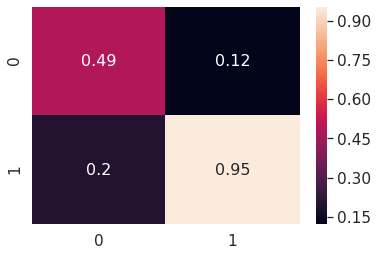

In [53]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)  
conf_matrix = conf_matrix / conf_matrix.astype(np.float).sum(axis=1)

df_cm = pd.DataFrame(conf_matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Text(0.5, 1.0, 'Feature Importance')

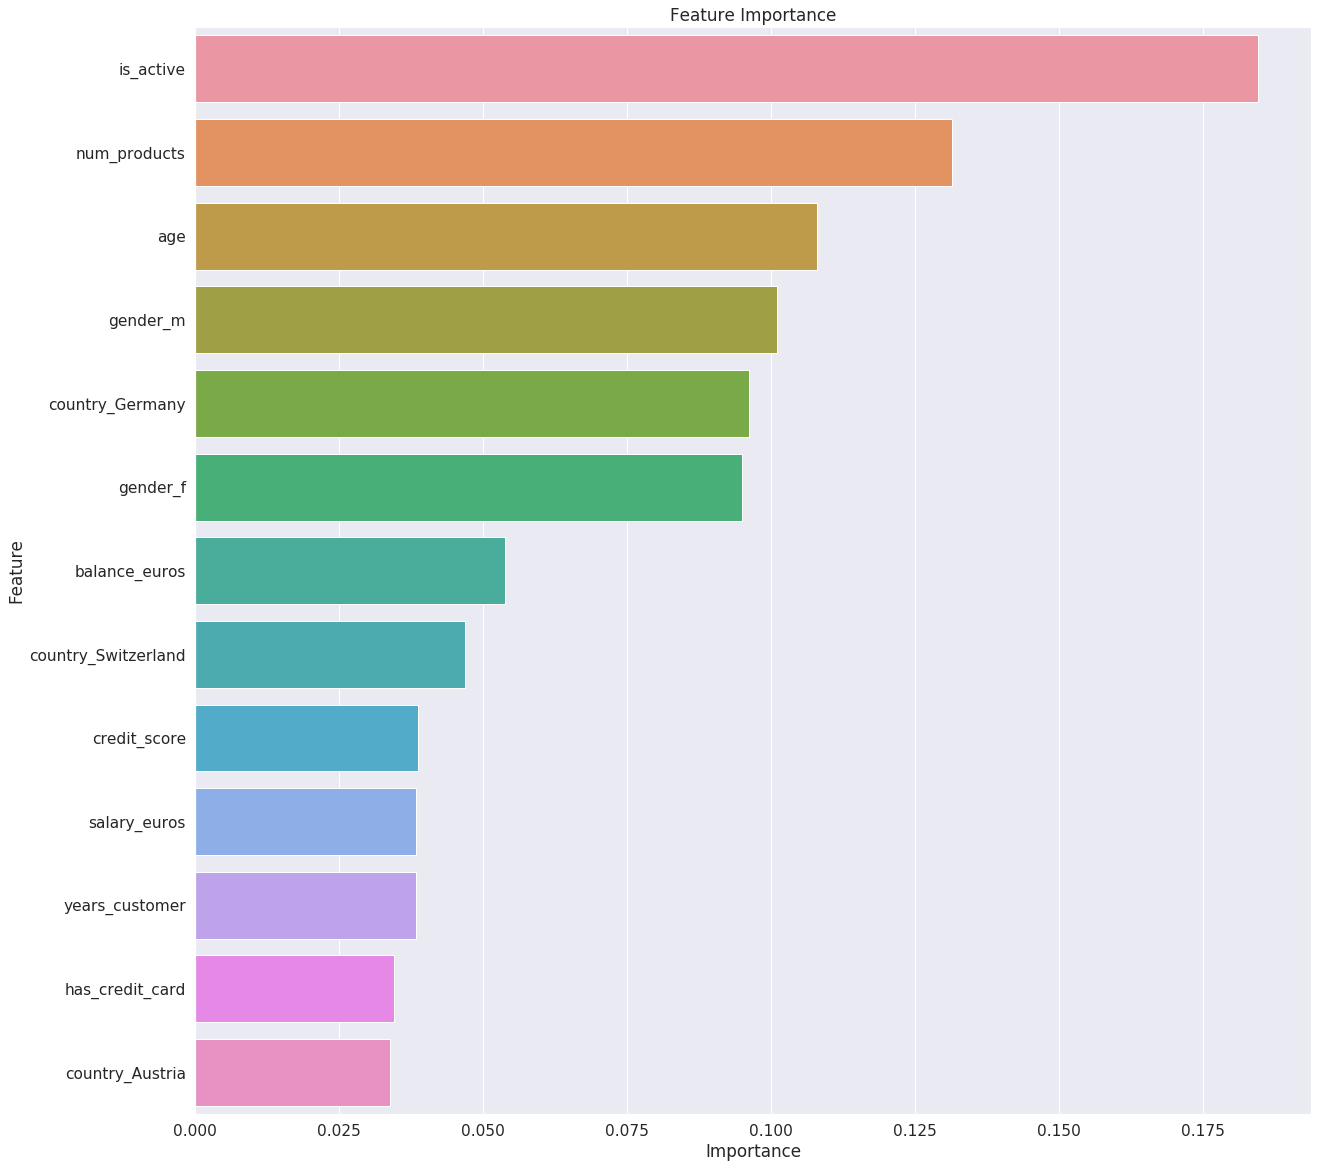

In [55]:
# plot the feature importance
feat_imp = pd.DataFrame({'Importance':xgb_final_model.feature_importances_,
                         'Feature': features_x} ).sort_values(ascending=False, by='Importance')

fig, axis = plt.subplots(1,1,figsize=(20,20))

feat_imp_top_15 = feat_imp.iloc[:15]
sns.barplot(y='Feature', x='Importance', data=feat_imp_top_15, order=feat_imp_top_15['Feature'].unique(), ax=axis)
axis.set_title('Feature Importance')

## Post Script:
We can also define other optimization metrics, such as with cost matrix if further information on costs of false positive, false negative, true positive, true negative is available.

## 3. From the customers currently retained, find the top k customers at highest risk of leaving DKB

In [112]:
def find_top_k_risky_customers(k = 10):
    df_dkb_retained = df_dkb_one_hot[df_dkb_one_hot['retained']==1].reset_index()
    
    X_retained = df_dkb_retained[features_x]

    y_proba = pd.DataFrame(xgb_final_model.predict_proba(X_retained))
    y_proba.columns = ['proba_not_retained', 'proba_retained']
    
    df_dkb_retained_w_proba = pd.concat([df_dkb_retained, y_proba.reindex(df_dkb_retained.index)], axis=1)
    
    return list(df_dkb_retained_w_proba.sort_values('proba_retained', ascending=True).iloc[:k]['id'])

In [113]:
find_top_k_risky_customers(k = 10)

[15691504,
 15657468,
 15791321,
 15586585,
 15631406,
 15797960,
 15648455,
 15707473,
 15771728,
 15698732]